In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# 데이터 불러오기
loan_result = pd.read_csv('/Users/sungahwang/Desktop/BigContest_data/loan_result.csv')
loan_result

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN
...,...,...,...,...,...,...,...
13527358,1428218,2022-06-03 12:01:58,62,200,3000000.0,14.8,NaN
13527359,1428218,2022-06-03 12:01:49,2,7,40000000.0,11.8,NaN
13527360,1428218,2022-06-03 12:01:48,32,257,15000000.0,7.2,NaN
13527361,1428218,2022-06-03 12:01:48,33,110,44000000.0,13.5,NaN


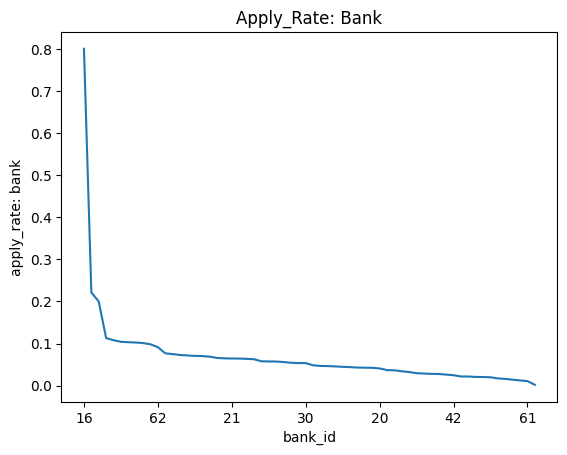

In [20]:
loan_result['bank_id'] = loan_result['bank_id'].astype('str')
loan_result.groupby('bank_id')['is_applied'].mean().sort_values(ascending = False).plot()
plt.title('Apply_Rate: Bank')
plt.xlabel('bank_id')
plt.ylabel('apply_rate: bank')
plt.show()

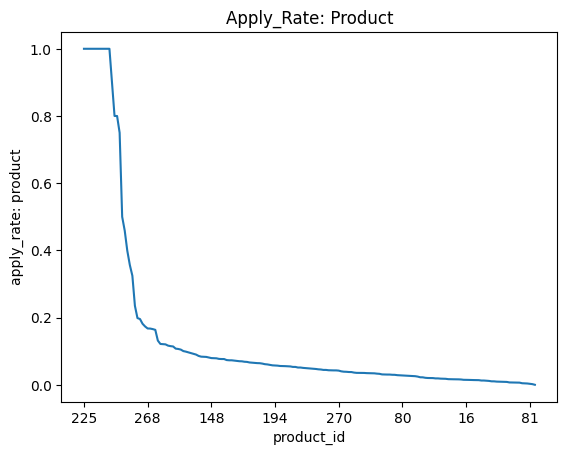

In [21]:
loan_result['product_id'] = loan_result['product_id'].astype(str)
loan_result.groupby('product_id')['is_applied'].mean().sort_values(ascending = False).plot()
plt.title('Apply_Rate: Product')
plt.xlabel('product_id')
plt.ylabel('apply_rate: product')
plt.show()

# 은행별 및 대출상품별 신청률 변수 추가

In [93]:
# 데이터 불러오기
merge = pd.read_csv('/Users/sungahwang/Desktop/BigContest_data/merge_clust.csv')
merge

,application_id,bank_id,product_id,loan_limit,loan_rate,is_applied,weekday,loanapply_insert_hour,user_id,gender,...,existing_loan_amt,reage,career,credit_grade,spec_clust,action_cnt,use_day_cnt,first_event,timeout_sum(s),cluster2
0,1748340,7,191,42000000.0,13.6,NaN,Tuesday,13,430982.0,1.0,...,15000000.0,20.0,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0,4
1,1748340,25,169,24000000.0,17.9,NaN,Tuesday,13,430982.0,1.0,...,15000000.0,20.0,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0,4
2,1748340,2,7,24000000.0,18.5,NaN,Tuesday,13,430982.0,1.0,...,15000000.0,20.0,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0,4
3,1748340,4,268,29000000.0,10.8,NaN,Tuesday,13,430982.0,1.0,...,15000000.0,20.0,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0,4
4,1748340,11,118,5000000.0,16.4,NaN,Tuesday,13,430982.0,1.0,...,15000000.0,20.0,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13525488,1969227,2,7,30000000.0,13.6,0.0,Monday,14,109899.0,1.0,...,107000000.0,40.0,2.0,7.0,4.0,178.0,27.0,EndLoanApply,350.0,0
13525489,1969227,33,110,9000000.0,14.4,0.0,Monday,14,109899.0,1.0,...,107000000.0,40.0,2.0,7.0,4.0,178.0,27.0,EndLoanApply,350.0,2
13525490,1969227,50,142,3000000.0,11.2,0.0,Monday,14,109899.0,1.0,...,107000000.0,40.0,2.0,7.0,4.0,178.0,27.0,EndLoanApply,350.0,0
13525491,1969227,22,100,4000000.0,15.3,0.0,Monday,14,109899.0,1.0,...,107000000.0,40.0,2.0,7.0,4.0,178.0,27.0,EndLoanApply,350.0,0


In [94]:
train = merge[merge.is_applied.notnull()]
train

,application_id,bank_id,product_id,loan_limit,loan_rate,is_applied,weekday,loanapply_insert_hour,user_id,gender,...,existing_loan_amt,reage,career,credit_grade,spec_clust,action_cnt,use_day_cnt,first_event,timeout_sum(s),cluster2
3255482,2157865,54,235,20000000.0,16.5,1.0,Monday,8,346970.0,1.0,...,162000000.0,50.0,10.0,7.0,4.0,49.0,6.0,EndLoanApply,119.0,0
3255483,576643,54,235,11000000.0,16.5,0.0,Monday,10,545882.0,1.0,...,106000000.0,40.0,4.0,7.0,4.0,105.0,12.0,EndLoanApply,208.0,0
3255484,576643,11,118,3000000.0,20.0,0.0,Monday,10,545882.0,1.0,...,106000000.0,40.0,4.0,7.0,4.0,105.0,12.0,EndLoanApply,208.0,5
3255485,2136706,42,216,10000000.0,13.5,0.0,Monday,10,558819.0,1.0,...,58000000.0,40.0,11.0,5.0,1.0,175.0,9.0,EndLoanApply,342.0,1
3255486,2136706,25,169,22000000.0,15.9,0.0,Monday,10,558819.0,1.0,...,58000000.0,40.0,11.0,5.0,1.0,175.0,9.0,EndLoanApply,342.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13525488,1969227,2,7,30000000.0,13.6,0.0,Monday,14,109899.0,1.0,...,107000000.0,40.0,2.0,7.0,4.0,178.0,27.0,EndLoanApply,350.0,0
13525489,1969227,33,110,9000000.0,14.4,0.0,Monday,14,109899.0,1.0,...,107000000.0,40.0,2.0,7.0,4.0,178.0,27.0,EndLoanApply,350.0,2
13525490,1969227,50,142,3000000.0,11.2,0.0,Monday,14,109899.0,1.0,...,107000000.0,40.0,2.0,7.0,4.0,178.0,27.0,EndLoanApply,350.0,0
13525491,1969227,22,100,4000000.0,15.3,0.0,Monday,14,109899.0,1.0,...,107000000.0,40.0,2.0,7.0,4.0,178.0,27.0,EndLoanApply,350.0,0


In [95]:
test = merge[merge.is_applied.isnull()]
test

,application_id,bank_id,product_id,loan_limit,loan_rate,is_applied,weekday,loanapply_insert_hour,user_id,gender,...,existing_loan_amt,reage,career,credit_grade,spec_clust,action_cnt,use_day_cnt,first_event,timeout_sum(s),cluster2
0,1748340,7,191,42000000.0,13.6,NaN,Tuesday,13,430982.0,1.0,...,15000000.0,20.0,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0,4
1,1748340,25,169,24000000.0,17.9,NaN,Tuesday,13,430982.0,1.0,...,15000000.0,20.0,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0,4
2,1748340,2,7,24000000.0,18.5,NaN,Tuesday,13,430982.0,1.0,...,15000000.0,20.0,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0,4
3,1748340,4,268,29000000.0,10.8,NaN,Tuesday,13,430982.0,1.0,...,15000000.0,20.0,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0,4
4,1748340,11,118,5000000.0,16.4,NaN,Tuesday,13,430982.0,1.0,...,15000000.0,20.0,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255477,1428218,62,200,3000000.0,14.8,NaN,Friday,12,478802.0,1.0,...,56000000.0,50.0,4.0,7.0,4.0,45.0,7.0,EndLoanApply,46.0,0
3255478,1428218,2,7,40000000.0,11.8,NaN,Friday,12,478802.0,1.0,...,56000000.0,50.0,4.0,7.0,4.0,45.0,7.0,EndLoanApply,46.0,0
3255479,1428218,32,257,15000000.0,7.2,NaN,Friday,12,478802.0,1.0,...,56000000.0,50.0,4.0,7.0,4.0,45.0,7.0,EndLoanApply,46.0,0
3255480,1428218,33,110,44000000.0,13.5,NaN,Friday,12,478802.0,1.0,...,56000000.0,50.0,4.0,7.0,4.0,45.0,7.0,EndLoanApply,46.0,2


# 파생변수: 은행별 대출 신청율

In [96]:
bank_apply_rate = pd.DataFrame(train.groupby('bank_id')['is_applied'].mean().sort_values())
bank_apply_rate

,is_applied
bank_id,
28,0.001962
61,0.010598
46,0.012281
12,0.014004
55,0.016036
...,...
49,0.107746
60,0.112861
4,0.199582


In [97]:
bank_apply_rate.isnull().sum()

is_applied    0
dtype: int64

In [98]:
print(train['bank_id'].value_counts().tail(20))

43    111856
28     94286
15     93761
56     76218
12     71480
4      70798
41     64355
64     62874
45     61166
7      59098
26     58335
51     58054
61     51519
20     38130
18     35813
60     30613
2      29504
39      6919
9       3982
16         5
Name: bank_id, dtype: int64


In [99]:
bank_apply_rate = bank_apply_rate.rename(columns={'is_applied' : 'bank_apply_rate'})
bank_apply_rate

,bank_apply_rate
bank_id,
28,0.001962
61,0.010598
46,0.012281
12,0.014004
55,0.016036
...,...
49,0.107746
60,0.112861
4,0.199582


In [100]:
merge = pd.merge(merge, bank_apply_rate, left_on = 'bank_id', right_on = 'bank_id', how = 'left')
merge

,application_id,bank_id,product_id,loan_limit,loan_rate,is_applied,weekday,loanapply_insert_hour,user_id,gender,...,reage,career,credit_grade,spec_clust,action_cnt,use_day_cnt,first_event,timeout_sum(s),cluster2,bank_apply_rate
0,1748340,7,191,42000000.0,13.6,NaN,Tuesday,13,430982.0,1.0,...,20.0,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0,4,0.103032
1,1748340,25,169,24000000.0,17.9,NaN,Tuesday,13,430982.0,1.0,...,20.0,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0,4,0.021634
2,1748340,2,7,24000000.0,18.5,NaN,Tuesday,13,430982.0,1.0,...,20.0,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0,4,0.098055
3,1748340,4,268,29000000.0,10.8,NaN,Tuesday,13,430982.0,1.0,...,20.0,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0,4,0.199582
4,1748340,11,118,5000000.0,16.4,NaN,Tuesday,13,430982.0,1.0,...,20.0,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0,5,0.017018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13525488,1969227,2,7,30000000.0,13.6,0.0,Monday,14,109899.0,1.0,...,40.0,2.0,7.0,4.0,178.0,27.0,EndLoanApply,350.0,0,0.098055
13525489,1969227,33,110,9000000.0,14.4,0.0,Monday,14,109899.0,1.0,...,40.0,2.0,7.0,4.0,178.0,27.0,EndLoanApply,350.0,2,0.042242
13525490,1969227,50,142,3000000.0,11.2,0.0,Monday,14,109899.0,1.0,...,40.0,2.0,7.0,4.0,178.0,27.0,EndLoanApply,350.0,0,0.064755
13525491,1969227,22,100,4000000.0,15.3,0.0,Monday,14,109899.0,1.0,...,40.0,2.0,7.0,4.0,178.0,27.0,EndLoanApply,350.0,0,0.027749


# 파생변수: 대출 상품 별 대출 신청율

In [101]:
product_apply_rate = pd.DataFrame(train.groupby('product_id')['is_applied'].mean().sort_values())
product_apply_rate

,is_applied
product_id,
211,0.000000
217,0.001962
81,0.002831
40,0.003859
139,0.004386
...,...
232,1.000000
116,1.000000
76,1.000000


In [102]:
product_apply_rate.isnull().sum()

is_applied    0
dtype: int64

In [103]:
print(train['product_id'].value_counts().tail(20))

147    291
146    197
232    153
76     147
21     135
93     114
13      63
46      20
166     12
116     12
52       8
193      7
190      5
238      5
240      4
165      3
55       2
211      1
225      1
53       1
Name: product_id, dtype: int64


In [104]:
product_apply_rate = product_apply_rate.rename(columns={'is_applied' : 'product_apply_rate'})

In [105]:
product_apply_rate

,product_apply_rate
product_id,
211,0.000000
217,0.001962
81,0.002831
40,0.003859
139,0.004386
...,...
232,1.000000
116,1.000000
76,1.000000


In [106]:
merge = pd.merge(merge, product_apply_rate, left_on = 'product_id', right_on = 'product_id', how = 'left')
merge

,application_id,bank_id,product_id,loan_limit,loan_rate,is_applied,weekday,loanapply_insert_hour,user_id,gender,...,career,credit_grade,spec_clust,action_cnt,use_day_cnt,first_event,timeout_sum(s),cluster2,bank_apply_rate,product_apply_rate
0,1748340,7,191,42000000.0,13.6,NaN,Tuesday,13,430982.0,1.0,...,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0,4,0.103032,0.114031
1,1748340,25,169,24000000.0,17.9,NaN,Tuesday,13,430982.0,1.0,...,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0,4,0.021634,0.035367
2,1748340,2,7,24000000.0,18.5,NaN,Tuesday,13,430982.0,1.0,...,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0,4,0.098055,0.093935
3,1748340,4,268,29000000.0,10.8,NaN,Tuesday,13,430982.0,1.0,...,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0,4,0.199582,0.167558
4,1748340,11,118,5000000.0,16.4,NaN,Tuesday,13,430982.0,1.0,...,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0,5,0.017018,0.016149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13525488,1969227,2,7,30000000.0,13.6,0.0,Monday,14,109899.0,1.0,...,2.0,7.0,4.0,178.0,27.0,EndLoanApply,350.0,0,0.098055,0.093935
13525489,1969227,33,110,9000000.0,14.4,0.0,Monday,14,109899.0,1.0,...,2.0,7.0,4.0,178.0,27.0,EndLoanApply,350.0,2,0.042242,0.037856
13525490,1969227,50,142,3000000.0,11.2,0.0,Monday,14,109899.0,1.0,...,2.0,7.0,4.0,178.0,27.0,EndLoanApply,350.0,0,0.064755,0.064755
13525491,1969227,22,100,4000000.0,15.3,0.0,Monday,14,109899.0,1.0,...,2.0,7.0,4.0,178.0,27.0,EndLoanApply,350.0,0,0.027749,0.006692


In [107]:
merge.isnull().sum()

application_id                               0
bank_id                                      0
product_id                                   0
loan_limit                                   0
loan_rate                                    0
is_applied                             3255482
weekday                                      0
loanapply_insert_hour                        0
user_id                                      0
gender                                       0
insert_time                                  0
yearly_income                                0
income_type                                  0
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn                   0
personal_rehabilitation_complete_yn          0
existing_loan_cnt                            0
existing_loan_amt                            0
reage        

## 파생변수의 결측값 채우기 -> clust2 을 기준으로 각 군집의 평균 값으로 대체

In [108]:
merge.groupby(['cluster2'])['bank_apply_rate'].mean()

cluster2
0    0.055198
1    0.052712
2    0.042242
3    0.059965
4    0.059107
5    0.017018
Name: bank_apply_rate, dtype: float64

In [114]:
merge.loc[(merge['bank_apply_rate'].isnull()) & (merge['cluster2'] == 0),'bank_apply_rate'] = 0.055198
merge.loc[(merge['bank_apply_rate'].isnull()) & (merge['cluster2'] == 1),'bank_apply_rate'] = 0.052712
merge.loc[(merge['bank_apply_rate'].isnull()) & (merge['cluster2'] == 2),'bank_apply_rate'] = 0.042242
merge.loc[(merge['bank_apply_rate'].isnull()) & (merge['cluster2'] == 3),'bank_apply_rate'] = 0.059965
merge.loc[(merge['bank_apply_rate'].isnull()) & (merge['cluster2'] == 4),'bank_apply_rate'] = 0.059107
merge.loc[(merge['bank_apply_rate'].isnull()) & (merge['cluster2'] == 5),'bank_apply_rate'] = 0.017018

In [109]:
merge.groupby(['cluster2'])['product_apply_rate'].mean()

cluster2
0    0.054978
1    0.050466
2    0.041948
3    0.061154
4    0.066060
5    0.016741
Name: product_apply_rate, dtype: float64

In [115]:
merge.loc[(merge['product_apply_rate'].isnull()) & (merge['cluster2'] == 0),'product_apply_rate'] = 0.054978
merge.loc[(merge['product_apply_rate'].isnull()) & (merge['cluster2'] == 1),'product_apply_rate'] = 0.050466
merge.loc[(merge['product_apply_rate'].isnull()) & (merge['cluster2'] == 2),'product_apply_rate'] = 0.041948
merge.loc[(merge['product_apply_rate'].isnull()) & (merge['cluster2'] == 3),'product_apply_rate'] = 0.061154
merge.loc[(merge['product_apply_rate'].isnull()) & (merge['cluster2'] == 4),'product_apply_rate'] = 0.066060
merge.loc[(merge['product_apply_rate'].isnull()) & (merge['cluster2'] == 5),'product_apply_rate'] = 0.016741

In [116]:
merge.isnull().sum()

application_id                               0
bank_id                                      0
product_id                                   0
loan_limit                                   0
loan_rate                                    0
is_applied                             3255482
weekday                                      0
loanapply_insert_hour                        0
user_id                                      0
gender                                       0
insert_time                                  0
yearly_income                                0
income_type                                  0
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn                   0
personal_rehabilitation_complete_yn          0
existing_loan_cnt                            0
existing_loan_amt                            0
reage        

In [118]:
merge.to_csv("merge_add.csv", index = False)